## Simple uncoated lens
This examples illustrates how to create a simple optical system consisting of a source, an uncoated lens and a detector. Two sources are created : one for ray analysis and one for ray display. The system and spot diagram are displayed. Mueller matrix is computed. As this an axially symmetric system, Mueller matrix for the on axis field would be an identity matrix.


In [1]:
# %matplotlib inline
import numpy as np
import sys
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random as rd
import copy as cp
from datetime import datetime as dt
#
sys.path.append('..')
from PyAstroPol import *
roundOffDisplay(5)

In [2]:
Source_analysis = Source(10000, Clear=40)                       # Source for ray analysis
Source_analysis.translateOrigin(z=-100)                         # Adjust source position
#
Source_display = Source(20, Clear=40)                           # Source for ray display
Source_display.translateOrigin(z=-100)                          # Adjust source (display) position
#
Lens_1 = UncoatedLens(50, 10, R1=200, R2=-200, n='N-BK7')       # Lens
#
Detector_1 = Detector(20)                                       # Detector
Detector_1.translateOrigin(z=200.3)                             # Adjust detector position

In [3]:
Sys = System(Source_analysis, [Lens_1], 
             Detector_1, dRays=Source_display)                          # Complete optical system
Sys.propagateRays()                                                     # Propagate rays through system

C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: invalid value encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np.sin(self.iTheta)
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  V = V/np.reshape(np.linalg.norm(V, axis=1), newshape=(Vs[0],1))
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a


C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:337: RuntimeWarning: invalid value encountered in true_divide
  tCosines = (self.iRays.oCosines + self.nCosines*np.cos(self.iTheta))/np.sin(self.iTheta)
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Functions.py:31: RuntimeWarning: invalid value encountered in true_divide
  V = V/np.reshape(np.linalg.norm(V, axis=1), newshape=(Vs[0],1))
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:268: RuntimeWarning: divide by zero encountered in true_divide
  dplus = (-b+np.sqrt(b**2-4.0*a*c))/2.0/a
C:\Users\pruthvi\Nextcloud\Work\HELLRIDE\2_Development\PyAstroPol\PyAstroPol\Surface.py:269: RuntimeWarning: invalid value encountered in true_divide
  dminus = (-b-np.sqrt(b**2-4.0*a*c))/2.0/a


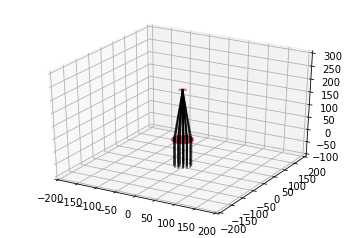

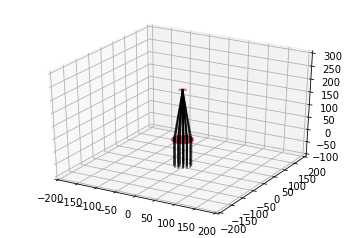

In [5]:
Fig = plt.figure()                                             
Ax = Fig.add_subplot(111, projection='3d')
Sys.draw(Ax)                                                       # Draw optical system
adjustAspect(Ax, 400, z=100)                                       # Adjust 3D space

In [ ]:
Fig = plt.figure()
Ax = Fig.add_subplot(111, aspect='equal')                       
Sys.drawSpotDiagram(Ax, s=0.1, color='r')                   # Draw spot diagram

In [ ]:
MM, Tra = Sys.getSystemMuellerMatrix()                      # Optical system's Mueller matrix
print('System Mueller matrix is : \n', MM)
print('Throughput is: ', Tra)  